In [1]:
# library required, see seg_helper.py and readme
from skimage import color
from skimage import morphology
from skimage.segmentation import felzenszwalb
from PIL import Image
from scipy.ndimage import imread
from scipy.misc import imresize
from sklearn.metrics import confusion_matrix

import math
import seg_helper as segh
import numpy as np
import matplotlib.pyplot as plt
import cv2
import skimage.measure as sk_measure
#from skimage.morphology import convex_hull_image

from growcut import growcut_cy
from skimage.segmentation import random_walker
import time

In [2]:
filename_num = '2'#'4.png'# ##
file_suffix = '.jpg'
print(filename_num+file_suffix)
input_img = imread(''.join(['./Dataset/simple/',filename_num + file_suffix]))
print(input_img.shape)

2.jpg
(378, 378, 3)


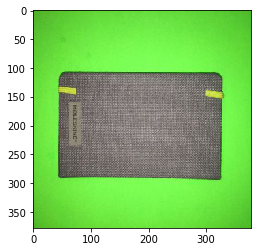

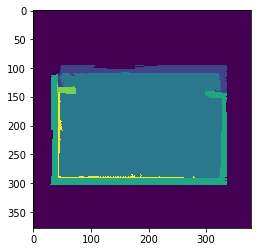

size  (378, 378)  Fel processing time  0.4062933921813965


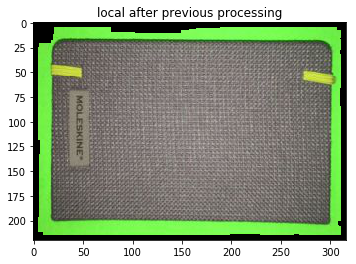

size  (378, 378)  GrabCut processing time  1.0626132488250732


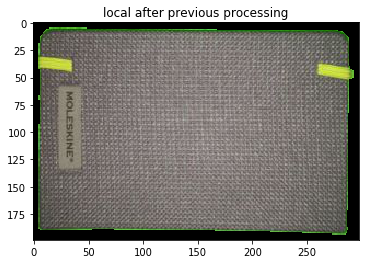

10
size  (378, 378)  GrowCut processing time  0.5470852851867676


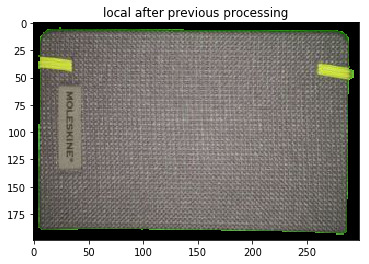

last mask| total processing time  2.9379196166992188


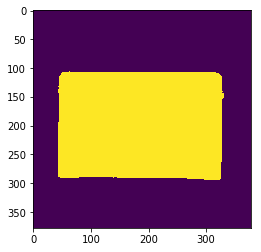

(378, 378)


In [6]:
largeness, gauss_sigma, br = 500, 0.5, 0.1   # br is used for identifying background 
spatial_radius, range_radius, min_density = 5, 10, 50
num_iter = 10
safe_zone_len, num_points = 3, -1 # for both growcut and random walk, -1 for non sampling
window_size = 4  #for growcut
beta = 130       #for random walk

Fel_para = ('Fel', largeness, gauss_sigma, br)
MeanShift_para = ('MeanShift', spatial_radius, range_radius, min_density, br) 
GrabCut_para = ('GrabCut',num_iter)
GrowCut_para = ('GrowCut', safe_zone_len, window_size, num_points)
RandomWalk_para = ('RandomWalk', safe_zone_len, beta, num_points)

# Define processing flow
# Some suggetion to choose flow combination
# 1. if image is dark, and you can find a path from background to shadow to object,
#    then use meanshift, subsample in first stage
# 2. if object has rigid boundary,
#    then use fel, subsample in the second stage
# 3. for growcut and randomwalk, non sampling version usually runs faster, no much 
#    difference between sampled version
# 4. for growcut and randomwalk, not much difference in results between two algorithm

# number between parameters represents downsampling rate based on image size in 
# previous processing unit. For example [0.5,X, 0.5,X], where X is some processing unit
# the output image and mask is 0.25 of the original one. The algorithm automatically
# rescale mask back to original size, hence there is no explicit rescaling parameter
# in the final stage
process_info = [1,Fel_para,1,GrabCut_para,1,GrowCut_para]

input_mask = segh.seg_image(input_img, process_info)
print(input_mask.shape)

# save image
save_img = Image.fromarray((input_mask * 255).astype(np.uint8))

out_file = filename_num + '_out.jpg'
save_img.save(out_file, "JPEG", quality=80, optimize=True, progressive=True)